In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
weather_df = pd.read_csv('/content/1. Weather Data.csv')
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Data Overview and Cleaning:

What are the key characteristics of the dataset? (e.g., number of records, features, data types)

Identify and handle any missing or null values. Describe your approach and reasoning.

Check for and address any duplicate records.

In [6]:
# shows the number of records and number of features available in the dataset
weather_df.shape

(8784, 8)

In [7]:
#the inforamtion about each and every feature, contsining teh data type
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [8]:
weather_df.isnull().count()


,0
Date/Time,8784
Temp_C,8784
Dew Point Temp_C,8784
Rel Hum_%,8784
Wind Speed_km/h,8784
Visibility_km,8784
Press_kPa,8784
Weather,8784


The above shows that there is no null or missing values. the code counts the number of fields that are blank or named as null. For our dataset, it returns that all of the fields are filled fully.

In [9]:
weather_df.duplicated().sum()

0

In [10]:
weather_df['Dew Point Temp_C'].duplicated().sum()


8295

from the above cell, it shows there is no duplicated record.

**Statistical Summary:**

Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.

Identify and describe any significant outliers in the data.

In [11]:
weather_df.describe()
#there are six numerical columns. The below shows the statistical values of each and every feature

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


Finding outliers for our dataset using the boxplot that plots all of the columns

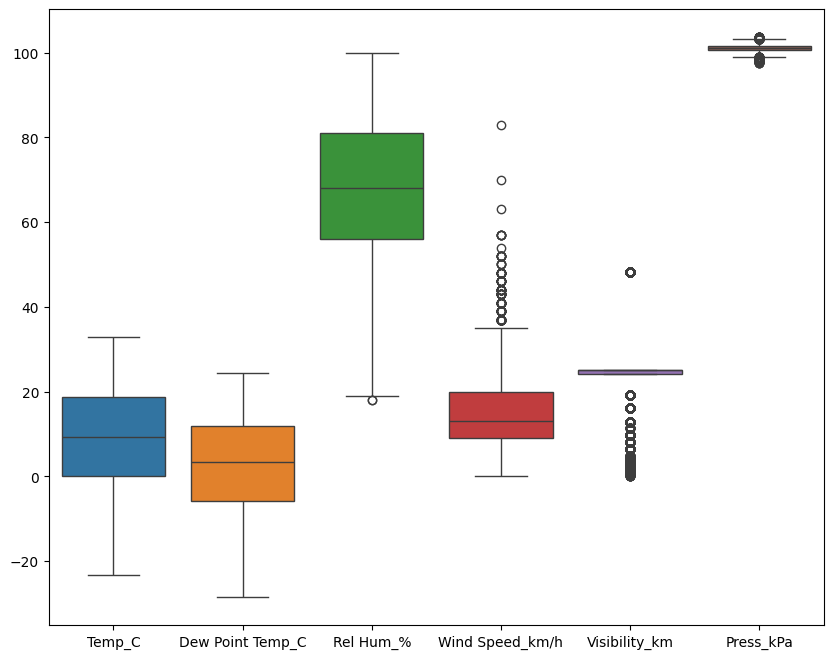

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(data=weather_df)
plt.show()
#

From the above boxplot, it is evident that Wind speed_km/h, visibility_km and press_kpa have outliers
The outliers basically show the values that are largely distinct from the other values

In [13]:
# finding the specific outliers from the column
wind_speed_Q1 = weather_df['Wind Speed_km/h'].quantile(0.25)
wind_speed_Q3 = weather_df['Wind Speed_km/h'].quantile(0.75)
wind_speed_IQR = wind_speed_Q3 - wind_speed_Q1
wind_speed_lower_bound = wind_speed_Q1 - 1.5 * wind_speed_IQR
wind_speed_upper_bound = wind_speed_Q3 + 1.5 * wind_speed_IQR
wind_speed_outliers = weather_df[(weather_df['Wind Speed_km/h'] < wind_speed_lower_bound) | (weather_df['Wind Speed_km/h'] > wind_speed_upper_bound)]
wind_speed_outliers.shape


(162, 8)

In [14]:
# plt.scatter(wind_speed_outliers.index, wind_speed_outliers['Dew Point Temp_C'], color='red')

The above cell shows the specific number of outliers present in each and every feature that showed to have outliers in the previous boxplot

QUESTION 3:
Data Visualization:

Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).

Plot time series graphs to visualize trends over time.

Highlight any notable patterns or seasonal variations.

Create correlation matrices and heatmaps to identify relationships between different weather parameters.

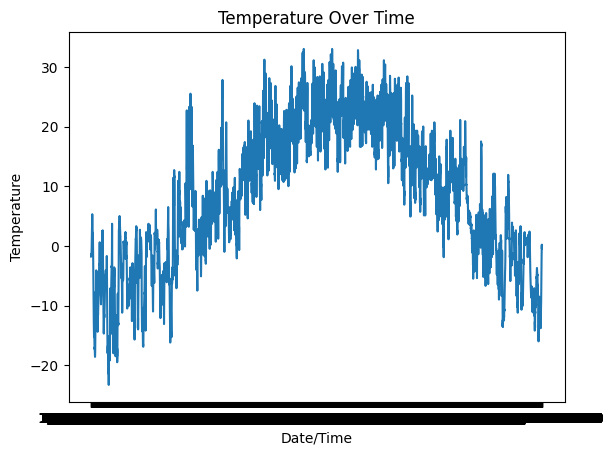

In [15]:
# Plot time series graphs to visualize trends over time.
#Temperature visualization over time
plt.plot(weather_df['Date/Time'], weather_df['Temp_C'], label='Temperature')
plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.show()

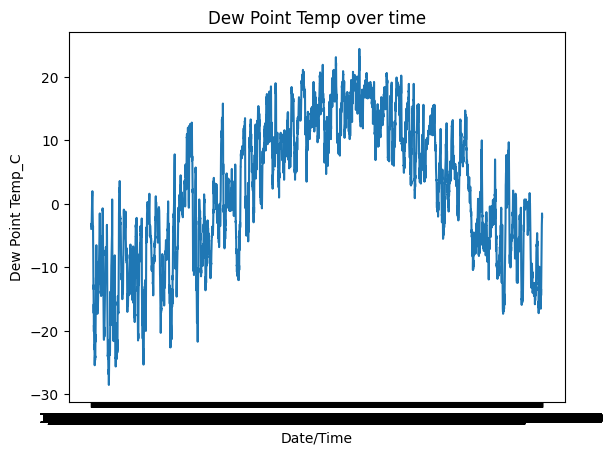

In [16]:
plt.plot(weather_df['Date/Time'], weather_df['Dew Point Temp_C'], label='Dew Point Temp_C')
plt.xlabel('Date/Time')
plt.ylabel('Dew Point Temp_C')
plt.title('Dew Point Temp over time')
plt.show()

The Dew point and the

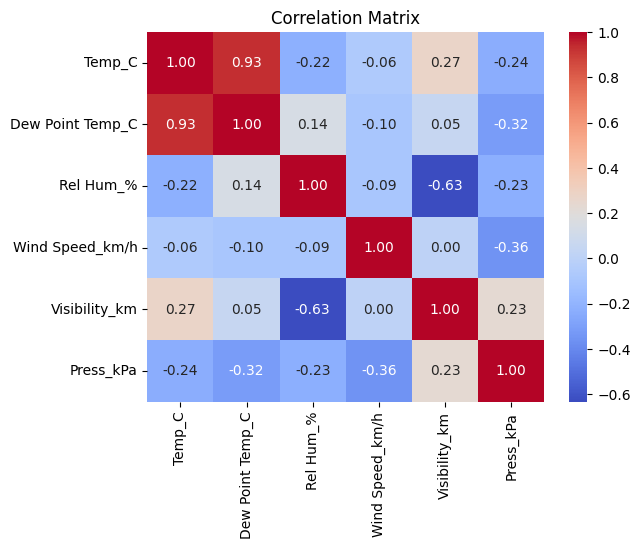

In [17]:
#Create correlation matrices and heatmaps to identify relationships between different weather parameters.
#correlation only works with numeric features hence the need to get the numeric datatypes
numeric_features = weather_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

4. Weather Patterns and Trends:

Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months?

Investigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?

In [18]:
weather_df[['Date', 'Time']] = weather_df['Date/Time'].str.split(expand=True)
weather_df.head()
#after spliting we now have the date and the time column. this can help us analyze based on specific months


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1/1/2012,0:00
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1/1/2012,1:00
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1/1/2012,2:00
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1/1/2012,3:00
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1/1/2012,4:00


In [19]:
#converting the date column to a date type and the time to a time datatype
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
weather_df['Time'] = pd.to_datetime(weather_df['Time'], format='%H:%M').dt.time
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   object        
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
 8   Date              8784 non-null   datetime64[ns]
 9   Time              8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 686.4+ KB


In [20]:
weather_df['Month'] = weather_df['Date'].dt.month_name()
unique_months = weather_df['Month'].unique()
print(unique_months)

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, 'November'),
  Text(0.0, 0, 'January'),
  Text(2.0, 0, 'March'),
  Text(4.0, 0, 'May'),
  Text(6.0, 0, 'July'),
  Text(8.0, 0, 'September'),
  Text(10.0, 0, 'November'),
  Text(12.0, 0, '')])

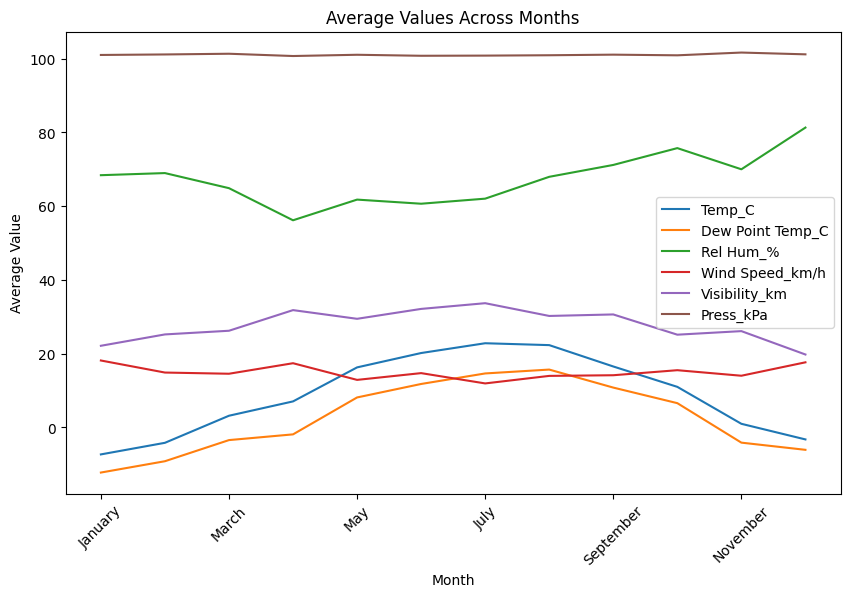

In [21]:
weather_df['Month'] = weather_df['Date'].dt.month_name()
# to calculate the mean, we cna only deal with the columns that are numeric in nature

numeric_cols = weather_df.select_dtypes(include=['number'])
# Combine the 'Month' column with the numeric columns for easy grouping
weather_numeric = pd.concat([weather_df['Month'], numeric_cols], axis=1)

# Group by 'Month' and calculate the mean
monthly_avg = weather_numeric.groupby('Month').mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the DataFrame to follow the correct month order
monthly_avg = monthly_avg.reindex(month_order)

# Plotting
monthly_avg.plot(kind='line', figsize=(10, 6))
plt.title('Average Values Across Months')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(rotation=45)

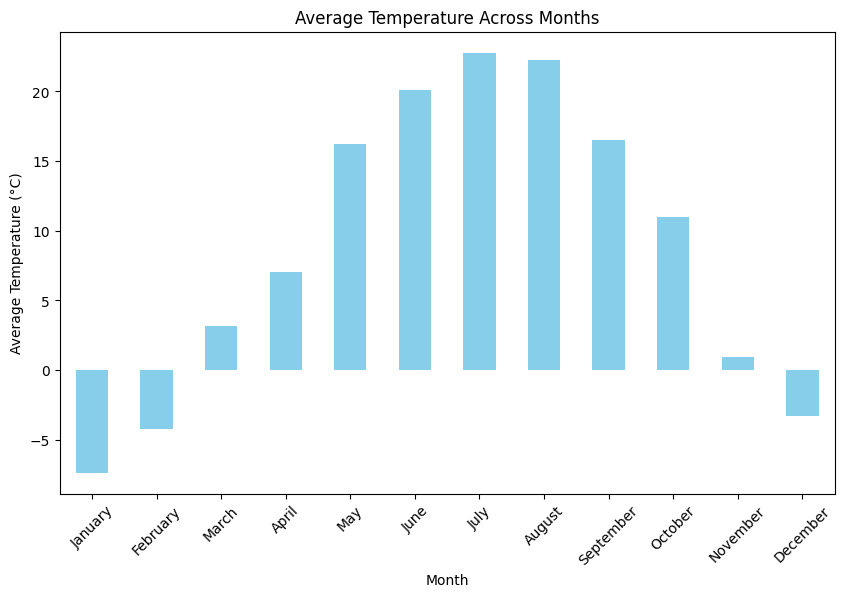

In [30]:

monthly_avg_temperature = monthly_avg['Temp_C']

# Plotting the bar graph for the average temperature across months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the DataFrame to follow the correct month order
monthly_avg_temperature = monthly_avg_temperature.reindex(month_order)
monthly_avg_temperature.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Adding titles and labels
plt.title('Average Temperature Across Months')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')  # Adjust the unit based on your dataset
plt.xticks(rotation=45)

# Show the plot
plt.show()

From the above graph, the data shows that June has the highest temperature in degrees celcious. The year starts at a low temperature and slowly increases upto June where it is highest then starts to drop again

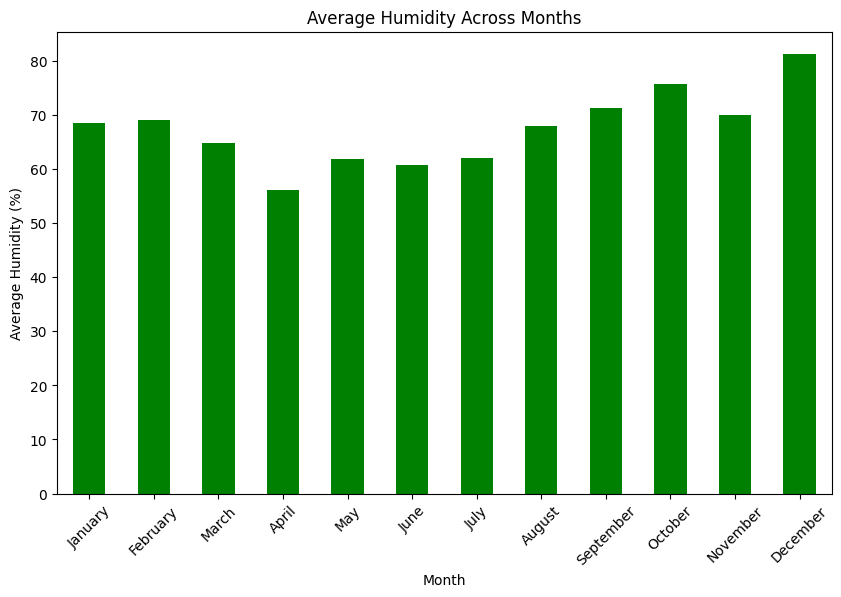

In [31]:
monthly_avg_humidity = monthly_avg['Rel Hum_%']

monthly_avg_humidity = monthly_avg_humidity.reindex(month_order)
monthly_avg_humidity.plot(kind='bar', figsize=(10, 6), color='green')

# Adding titles and labels
plt.title('Average Humidity Across Months')
plt.xlabel('Month')
plt.ylabel('Average Humidity (%)')  # Adjust the unit based on your dataset
plt.xticks(rotation=45)

plt.show()

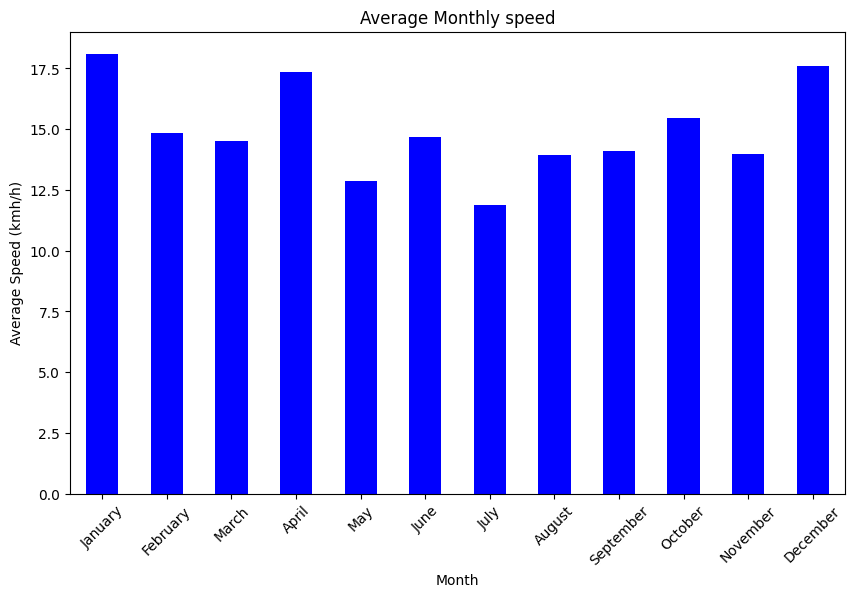

In [34]:
monthly_avg_wind_speed = monthly_avg['Wind Speed_km/h']

monthly_avg_wind_speed  = monthly_avg_wind_speed .reindex(month_order)
monthly_avg_wind_speed .plot(kind='bar', figsize=(10, 6), color='blue')

# Adding titles and labels
plt.title('Average Monthly speed')
plt.xlabel('Month')
plt.ylabel('Average Speed (kmh/h)')  # Adjust the unit based on your dataset
plt.xticks(rotation=45)
plt.show()

5. Insights and Conclusions:

Summarize the key insights you have gained from your EDA. What are the most interesting or surprising findings?

How can these insights be useful for weather prediction or other practical applications?

From the exploratory data analysis of the weather dataset, i have learnt a number of things regarding the weather patterns which can be usefull in the weather prediction process.
1. In the early months , the Temperatures are low and as time goes by the the temperature increases to slightly above 30 degrees and it falls again. This information can be used in planning of activites such as games or clothings for individuals.
2. when the speed levels are high, the humidity levels are always low and this is shown by the last two graphs represented in the below section.